In [646]:
library(data.table)
#require(xlsx)
library(readxl)
library(readxlsb)
library(data.table)
library(rpart)
library(rpart.plot)
library(readxl)
library(stringr)
library(pmml)

In [396]:
##lettura dati EWS
dt_ews <- read_xlsx('data/EWS_ceduti_enriched.xlsx', sheet = 'CEDUTI_ENRICHED')
colnames(dt_ews)<- tolower(colnames(dt_ews))
setDT(dt_ews)
dt_ews[,d_riferimento := as.Date(d_riferimento)]
col_ews_pred <- colnames(dt_ews)[grepl("pred",colnames(dt_ews))]

In [599]:
## Lettura dati VPC con nuove colonne
excel_sheets('data/DB_FINALE_INTEGRATO_v01.xlsx')
#dtv2 <- readRDS('data/DB_FINALE_INTEGRATO_v01.RDS')

[1] "QUERY_FOR_DB_FINALE_INTEGRATO"

In [600]:
dtv1 <- read_excel('data/DB_FINALE_INTEGRATO_v01.xlsx', sheet = 'QUERY_FOR_DB_FINALE_INTEGRATO')
colnames(dtv1)<- tolower(colnames(dtv1))
setDT(dtv1)

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX1334 / R1334C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX1335 / R1335C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CV1429 / R1429C100: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IH1429 / R1429C242: got 'CED.:398422010 LIM1:  1000000,00 POT:  5000000,00 LIM2:  2000000,00 RIS:     8000,00 CL.C'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN1501 / R1501C248: got 'TOT.ACC:           26896,00 TOT.SCO:           12295,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX1570 / R1570C50: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP6337 / R6337C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX6411 / R6411C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CX6513 / R6513C102: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX6536 / R6536C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IP6862 / R6862C250: got 'DEB.BAN:            9051,57 FATTUR.:            8090,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX6982 / R6982C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX7

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX9594 / R9594C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CX10106 / R10106C102: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX10518 / R10518C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX10549 / R10549C258: got 'S'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN11020 / R11020C248: got 'TOT.ACC:          780895,00 TOT.SCO:           94596,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX11023 / R11023C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical i

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX11804 / R11804C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX11864 / R11864C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CX12151 / R12151C102: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP12173 / R12173C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX12188 / R12188C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX12255 / R12255C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX12256 / R12256C258: got 'V'”
Warning messag

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX13346 / R13346C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN13357 / R13357C248: got 'TOT.ACC:         3063180,00 TOT.SCO:          833158,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX13387 / R13387C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IP13486 / R13486C250: got 'DEB.BAN:            7747,85 FATTUR.:            3894,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX13497 / R13497C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IP13497 / R13497C250: got 'DEB.BAN:           40123,58 FATTUR.:            3482,00'”
W

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN14739 / R14739C248: got 'TOT.ACC:           87619,00 TOT.SCO:           11776,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX14754 / R14754C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX14757 / R14757C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX14849 / R14849C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX14853 / R14853C258: got 'S'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX14873 / R14873C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in I

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX16412 / R16412C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX16413 / R16413C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX16414 / R16414C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN16541 / R16541C248: got 'TOT.ACC:          914795,00 TOT.SCO:          389231,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX16549 / R16549C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX16664 / R16664C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX18982 / R18982C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ19000 / R19000C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX19001 / R19001C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX19007 / R19007C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX19111 / R19111C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX19126 / R19126C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX19208 / R19208C50: got '*'”
Warning message in read

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN20576 / R20576C248: got 'TOT.ACC:           41412,00 TOT.SCO:            7495,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX20605 / R20605C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX20606 / R20606C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP20606 / R20606C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN20646 / R20646C248: got 'TOT.ACC:         1032150,00 TOT.SCO:          146403,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP20664 / R20664C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX22080 / R22080C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX22081 / R22081C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX22135 / R22135C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX22185 / R22185C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX22186 / R22186C258: got 'S'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX22383 / R22383C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX22674 / R22674C50: got '*'”
Warning message in read_

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ24370 / R24370C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX24416 / R24416C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX24426 / R24426C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX24596 / R24596C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ24633 / R24633C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ24634 / R24634C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX24717 / R24717C50: got '*'”
Warning message in r

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ27238 / R27238C260: got 'APP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ27240 / R27240C260: got 'APP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX27395 / R27395C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX27396 / R27396C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX27397 / R27397C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX27398 / R27398C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX27399 / R27399C50: got '*'”
Warning message in re

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX29857 / R29857C258: got 'S'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX29859 / R29859C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN29880 / R29880C248: got 'TOT.ACC:         3101609,00 TOT.SCO:          650000,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX29882 / R29882C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX29883 / R29883C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX29884 / R29884C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in 

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX31576 / R31576C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX31630 / R31630C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX31655 / R31655C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX31656 / R31656C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX31757 / R31757C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX31872 / R31872C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ31908 / R31908C260: got 'APP'”
Warning message in read

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX33343 / R33343C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX33353 / R33353C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IP33367 / R33367C250: got 'DEB.BAN:            4686,00 FATTUR.:            5077,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ33387 / R33387C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX33389 / R33389C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX33391 / R33391C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in 

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX33695 / R33695C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX33733 / R33733C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP33740 / R33740C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX33800 / R33800C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX33805 / R33805C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX33806 / R33806C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX33808 / R33808C258: got 'V'”
Warning message in r

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP34414 / R34414C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX34431 / R34431C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX34451 / R34451C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX34464 / R34464C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP34465 / R34465C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IP34472 / R34472C250: got 'DEB.BAN:          182266,40 FATTUR.:          164213,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting log

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX34719 / R34719C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX34720 / R34720C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX34721 / R34721C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX34722 / R34722C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX34723 / R34723C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX34733 / R34733C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX34760 / R34760C50: got '*'”
Warning message in read_fu

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX35169 / R35169C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX35189 / R35189C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX35190 / R35190C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX35191 / R35191C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX35192 / R35192C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX35193 / R35193C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX35194 / R35194C50: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX35526 / R35526C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE35526 / R35526C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX35527 / R35527C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX35528 / R35528C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX35529 / R35529C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX35530 / R35530C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX35531 / R35531C50: got '*'”
Warning message in read_f

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX35815 / R35815C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX35816 / R35816C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX35819 / R35819C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX35820 / R35820C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX35821 / R35821C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX35822 / R35822C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX35823 / R35823C50: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX36034 / R36034C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX36035 / R36035C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX36036 / R36036C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX36045 / R36045C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX36058 / R36058C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX36059 / R36059C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX36060 / R36060C50: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX36492 / R36492C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX36506 / R36506C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX36507 / R36507C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP36514 / R36514C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX36520 / R36520C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX36521 / R36521C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX36522 / R36522C50: got '*'”
Warning message in rea

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX37069 / R37069C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX37075 / R37075C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX37076 / R37076C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX37077 / R37077C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ37091 / R37091C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX37098 / R37098C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX37099 / R37099C50: got '*'”
Warning message in read_f

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ37780 / R37780C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ37781 / R37781C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN37835 / R37835C248: got 'TOT.ACC:         5958506,00 TOT.SCO:         1835888,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX37837 / R37837C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX37840 / R37840C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP37841 / R37841C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logi

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX38336 / R38336C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX38337 / R38337C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX38391 / R38391C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX38392 / R38392C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX38394 / R38394C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX38451 / R38451C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX38536 / R38536C50: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX39118 / R39118C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX39119 / R39119C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX39120 / R39120C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX39121 / R39121C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX39125 / R39125C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX39136 / R39136C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP39150 / R39150C302: got 'CODO6'”
Warning message in rea

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX39712 / R39712C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX39713 / R39713C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX39714 / R39714C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX39715 / R39715C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX39716 / R39716C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX39717 / R39717C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX39718 / R39718C50: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX40323 / R40323C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX40326 / R40326C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE40355 / R40355C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ40375 / R40375C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ40376 / R40376C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX40388 / R40388C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX40389 / R40389C50: got '*'”
Warning message in re

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX41045 / R41045C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP41070 / R41070C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX41081 / R41081C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX41082 / R41082C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP41106 / R41106C302: got 'COLC2'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX41111 / R41111C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX41112 / R41112C50: got '*'”
Warning message 

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX41655 / R41655C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX41656 / R41656C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN41657 / R41657C248: got 'TOT.ACC:         5994779,00 TOT.SCO:          941234,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN41679 / R41679C248: got 'TOT.ACC:        67726261,00 TOT.SCO:        23497352,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX41695 / R41695C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX41710 / R41710C50: got '*'”
Warning message in read_fun(path = enc2native(normalizeP

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LD42115 / R42115C316: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE42115 / R42115C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX42116 / R42116C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LC42116 / R42116C315: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LD42116 / R42116C316: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE42116 / R42116C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX42117 / R42117C50: got '*'”
Warning message i

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX42910 / R42910C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP42912 / R42912C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX42922 / R42922C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX42923 / R42923C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX42927 / R42927C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX42928 / R42928C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX42929 / R42929C50: got '*'”
Warning message in rea

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP43476 / R43476C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX43477 / R43477C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX43478 / R43478C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX43488 / R43488C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX43499 / R43499C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX43500 / R43500C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX43512 / R43512C50: got '*'”
Warning message in rea

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX44249 / R44249C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX44250 / R44250C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX44251 / R44251C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN44253 / R44253C248: got 'TOT.ACC:        44975493,00 TOT.SCO:         5878931,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX44264 / R44264C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX44265 / R44265C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX44875 / R44875C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX44876 / R44876C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX44885 / R44885C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX44886 / R44886C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX44952 / R44952C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX44977 / R44977C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE44979 / R44979C317: got 'NO'”
Warning message in read_f

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX45345 / R45345C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX45346 / R45346C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX45347 / R45347C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX45348 / R45348C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX45360 / R45360C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX45405 / R45405C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX45407 / R45407C50: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX46020 / R46020C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP46020 / R46020C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX46021 / R46021C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX46022 / R46022C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP46022 / R46022C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX46023 / R46023C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX46024 / R46024C50: got '*'”
Warning message i

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN46538 / R46538C248: got 'TOT.ACC:         5341708,00 TOT.SCO:          945548,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IP46538 / R46538C250: got 'DEB.BAN:           16273,10 FATTUR.:           10009,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN46539 / R46539C248: got 'TOT.ACC:         5308392,00 TOT.SCO:          946270,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IP46539 / R46539C250: got 'DEB.BAN:           16273,10 FATTUR.:           10009,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX46555 / R46555C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, 

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ47184 / R47184C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX47189 / R47189C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN47217 / R47217C248: got 'TOT.ACC:          504756,00 TOT.SCO:           61155,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IP47217 / R47217C250: got 'DEB.BAN:            1996,33 FATTUR.:            1530,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP47223 / R47223C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX47224 / R47224C50: got '*'”
Warning message in read_fun(path = enc2native(nor

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX47905 / R47905C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX47934 / R47934C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX47935 / R47935C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX47948 / R47948C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX47964 / R47964C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX48029 / R48029C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX48033 / R48033C50: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX48626 / R48626C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX48627 / R48627C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP48627 / R48627C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX48686 / R48686C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX48702 / R48702C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX48703 / R48703C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX48704 / R48704C50: got '*'”
Warning message in rea

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX49374 / R49374C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX49375 / R49375C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX49376 / R49376C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX49377 / R49377C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX49378 / R49378C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP49378 / R49378C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX49391 / R49391C50: got '*'”
Warning message in rea

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX50534 / R50534C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX50570 / R50570C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX50574 / R50574C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX50575 / R50575C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX50603 / R50603C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX50603 / R50603C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN50621 / R50621C248: got 'TOT.ACC:          885240,00

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX51312 / R51312C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX51313 / R51313C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX51314 / R51314C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX51315 / R51315C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX51316 / R51316C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX51317 / R51317C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX51318 / R51318C50: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX52120 / R52120C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX52122 / R52122C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX52123 / R52123C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX52124 / R52124C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX52179 / R52179C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN52187 / R52187C248: got 'TOT.ACC:           31964,00 TOT.SCO:            3990,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP52821 / R52821C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IP52822 / R52822C250: got 'DEB.BAN:           47728,57 FATTUR.:           36289,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IP52823 / R52823C250: got 'DEB.BAN:           47728,57 FATTUR.:           36289,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IP52824 / R52824C250: got 'DEB.BAN:           47728,57 FATTUR.:           36289,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX52857 / R52857C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX52870 / R52870C258: got 

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX53785 / R53785C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX53786 / R53786C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX53806 / R53806C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX53812 / R53812C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX53813 / R53813C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX53814 / R53814C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX53815 / R53815C50: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX54261 / R54261C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX54280 / R54280C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX54287 / R54287C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX54288 / R54288C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX54289 / R54289C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX54337 / R54337C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX54338 / R54338C50: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX55128 / R55128C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX55129 / R55129C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX55130 / R55130C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX55131 / R55131C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX55152 / R55152C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX55153 / R55153C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX55154 / R55154C258: got 'V'”
Warning message in read_

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX55562 / R55562C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX55563 / R55563C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX55564 / R55564C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX55565 / R55565C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX55634 / R55634C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX55635 / R55635C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX55636 / R55636C50: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX56420 / R56420C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX56433 / R56433C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX56454 / R56454C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX56455 / R56455C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX56456 / R56456C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX56457 / R56457C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX56458 / R56458C50: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX56803 / R56803C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ56860 / R56860C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX56867 / R56867C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX56881 / R56881C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX56883 / R56883C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX56884 / R56884C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX56887 / R56887C50: got '*'”
Warning message in read_

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX60599 / R60599C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX60600 / R60600C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX60602 / R60602C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX60603 / R60603C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP60611 / R60611C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX60741 / R60741C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX60803 / R60803C50: got '*'”
Warning message in re

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ61221 / R61221C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ61222 / R61222C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ61223 / R61223C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP61295 / R61295C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN61311 / R61311C248: got 'TOT.ACC:         5920282,00 TOT.SCO:         2751992,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX61431 / R61431C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting lo

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX65889 / R65889C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX65889 / R65889C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX65890 / R65890C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX65891 / R65891C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX65892 / R65892C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX66935 / R66935C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX66936 / R66936C258: got 'S'”
Warning message in read_

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP73389 / R73389C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IP73402 / R73402C250: got 'DEB.BAN:             144,76 FATTUR.:             101,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX73624 / R73624C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX73630 / R73630C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP73727 / R73727C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ73756 / R73756C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting 

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX75788 / R75788C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP75821 / R75821C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX76151 / R76151C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX76152 / R76152C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX76153 / R76153C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX76239 / R76239C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX76323 / R76323C258: got 'V'”
Warning message in re

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX78538 / R78538C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX78539 / R78539C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX78540 / R78540C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX79193 / R79193C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX79203 / R79203C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX79223 / R79223C258: got 'S'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX79226 / R79226C50: got '*'”
Warning message in read_f

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LD90095 / R90095C316: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE90095 / R90095C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX90096 / R90096C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX90300 / R90300C258: got 'S'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX90915 / R90915C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX91201 / R91201C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE91477 / R91477C317: got 'NO'”
Warning message in 

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP95153 / R95153C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IP95165 / R95165C250: got 'DEB.BAN:            1950,19 FATTUR.:            1735,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX95284 / R95284C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX95285 / R95285C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP95458 / R95458C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX95599 / R95599C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting log

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX98842 / R98842C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX98844 / R98844C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX98845 / R98845C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX98846 / R98846C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX98847 / R98847C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX98848 / R98848C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX98849 / R98849C50: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX101666 / R101666C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX101667 / R101667C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX101668 / R101668C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CX102586 / R102586C102: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX102696 / R102696C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX103367 / R103367C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX103368 / R103368C258: got 'V'”
Wa

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX105129 / R105129C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP105129 / R105129C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX105163 / R105163C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX105209 / R105209C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN105232 / R105232C248: got 'TOT.ACC:        21361018,00 TOT.SCO:         9364812,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX105254 / R105254C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expect

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX107975 / R107975C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ108201 / R108201C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ108202 / R108202C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ108203 / R108203C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IP108426 / R108426C250: got 'DEB.BAN:            4385,52 FATTUR.:             926,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IP108427 / R108427C250: got 'DEB.BAN:            4385,52 FATTUR.:             926,00'”
Warning message in read_fun(path = enc

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE113070 / R113070C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE113072 / R113072C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE113074 / R113074C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE113076 / R113076C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE113078 / R113078C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE113080 / R113080C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE113082 / R113082C317: got 'NO'”

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE113347 / R113347C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE113349 / R113349C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE113351 / R113351C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE113353 / R113353C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE113355 / R113355C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE113357 / R113357C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE113359 / R113359C317: got 'NO'”

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN123615 / R123615C248: got 'TOT.ACC:           48245,00 TOT.SCO:           33311,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX123872 / R123872C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IP123902 / R123902C250: got 'DEB.BAN:           43745,79 FATTUR.:           39048,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX123980 / R123980C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX123981 / R123981C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX124064 / R124064C50: got '*'”
Warning message in read_fun(path = enc2nativ

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX126023 / R126023C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX126182 / R126182C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX126183 / R126183C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX126368 / R126368C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IP126490 / R126490C250: got 'DEB.BAN:          133193,18 FATTUR.:          111576,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX126497 / R126497C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE128510 / R128510C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX128531 / R128531C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP128561 / R128561C302: got 'COLC2'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP128562 / R128562C302: got 'COLC2'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX128576 / R128576C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP128738 / R128738C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX128925 / R128925C50: got 

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX132859 / R132859C258: got 'S'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ133081 / R133081C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ133082 / R133082C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ133083 / R133083C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ133084 / R133084C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IZ133085 / R133085C260: got 'PP'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP134197 / R134197C302: got 'CODO6

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX143657 / R143657C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX143658 / R143658C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN143848 / R143848C248: got 'TOT.ACC:           16760,00 TOT.SCO:           32708,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP144045 / R144045C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX144205 / R144205C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX144342 / R144342C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expe

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX146570 / R146570C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX146570 / R146570C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX146571 / R146571C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX146572 / R146572C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN146582 / R146582C248: got 'TOT.ACC:          176354,00 TOT.SCO:          127610,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX146800 / R146800C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX148830 / R148830C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX148831 / R148831C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX148832 / R148832C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX148833 / R148833C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX148834 / R148834C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX148836 / R148836C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX148837 / R148837C50: got '*'”
Warning messa

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX149298 / R149298C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX149299 / R149299C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX149300 / R149300C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX149301 / R149301C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX149305 / R149305C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX149306 / R149306C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX149307 / R149307C50: got '*'”
Warning messa

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP149607 / R149607C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CX149618 / R149618C102: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CX149619 / R149619C102: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CX149620 / R149620C102: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CX149626 / R149626C102: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CX149630 / R149630C102: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CX149631 / R149

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX150206 / R150206C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX150265 / R150265C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX150279 / R150279C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX150280 / R150280C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX150281 / R150281C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX150282 / R150282C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX150285 / R150285C50: got '*'”
Warning messa

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX151963 / R151963C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX151975 / R151975C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX152139 / R152139C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX152139 / R152139C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX152140 / R152140C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX152141 / R152141C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IP152141 / R152141C250: got 'DEB.BAN:      

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX155306 / R155306C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX155307 / R155307C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX155349 / R155349C258: got 'S'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX155363 / R155363C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX155622 / R155622C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX155638 / R155638C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX155639 / R155639C50: got '*'”
Warning mess

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX157764 / R157764C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX157765 / R157765C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX157766 / R157766C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX157831 / R157831C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX157832 / R157832C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX157833 / R157833C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX157834 / R157834C50: got '*'”
Warning messa

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX161720 / R161720C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX161721 / R161721C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX161722 / R161722C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX161748 / R161748C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX162214 / R162214C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX162215 / R162215C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE162215 / R162215C317: got 'NO'”
Warning me

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX165292 / R165292C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN165295 / R165295C248: got 'TOT.ACC:           33446,00 TOT.SCO:           19577,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP165345 / R165345C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX165772 / R165772C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX165885 / R165885C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX166008 / R166008C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expe

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX170161 / R170161C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX170170 / R170170C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX170310 / R170310C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX170381 / R170381C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX170382 / R170382C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX170383 / R170383C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX170406 / R170406C50: got '*'”
Warning mess

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX173351 / R173351C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX173352 / R173352C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX173353 / R173353C258: got 'S'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX173403 / R173403C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX173603 / R173603C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX173715 / R173715C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX173716 / R173716C50: got '*'”
Warning m

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX180900 / R180900C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX180901 / R180901C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX180902 / R180902C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX180903 / R180903C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX181001 / R181001C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX181015 / R181015C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX181016 / R181016C50: got '*'”
Warning mess

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LD184590 / R184590C316: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE184590 / R184590C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX184705 / R184705C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX184807 / R184807C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in KP184893 / R184893C302: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX184911 / R184911C258: got 'S'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX185144 / R185144C50: got '*'”
War

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX190285 / R190285C258: got 'S'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX190315 / R190315C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX190356 / R190356C258: got 'S'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CX190380 / R190380C102: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX190506 / R190506C258: got 'S'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX190509 / R190509C258: got 'S'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX190890 / R190890C258: got 'V'”
War

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LC193431 / R193431C315: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LD193431 / R193431C316: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE193431 / R193431C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX193432 / R193432C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE193432 / R193432C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX193433 / R193433C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX193443 / R193443C258: got 'S'”
Warn

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LD200245 / R200245C316: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE200245 / R200245C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX200246 / R200246C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX200247 / R200247C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX200749 / R200749C258: got 'S'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX200809 / R200809C258: got 'S'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX201082 / R201082C258: got 'S'”
Warnin

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX211546 / R211546C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX212069 / R212069C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX212070 / R212070C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX212271 / R212271C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE212796 / R212796C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX213089 / R213089C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX213090 / R213090C50: got '*'”
Warning mes

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IN220263 / R220263C248: got 'TOT.ACC:           93734,00 TOT.SCO:           18770,00'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX220682 / R220682C258: got 'S'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE221938 / R221938C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX222324 / R222324C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX222673 / R222673C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in LE222710 / R222710C317: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expect

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX234505 / R234505C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AX234684 / R234684C50: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX234724 / R234724C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX234767 / R234767C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX234768 / R234768C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX234921 / R234921C258: got 'V'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in IX234969 / R234969C258: got 'V'”
Warning

In [611]:
dtv1[,data_richiesta := as.Date(substr(data_delibera_o_annull_fido,1,10))]
saveRDS(dtv1,'data/DB_FINALE_INTEGRATO_v01.RDS')

In [575]:
## Lettura dati VPC con nuove colonne
excel_sheets('data/DB_FINALE_INTEGRATO_v02.xlsx')
#dtv2 <- readRDS('data/DB_FINALE_INTEGRATO_v01.RDS')
dtv2 <- read_xlsx('data/DB_FINALE_INTEGRATO_v02.xlsx', sheet = 'DB')
colnames(dtv2)<- tolower(colnames(dtv2))
setDT(dtv2)

[1] "DB"               "Limiti societari" "Transcodifica"

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CE1429 / R1429C83: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ1570 / R1570C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ1581 / R1581C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ1582 / R1582C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ1583 / R1583C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR1772 / R1772C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG1823 / R1823C137: got 'NO'”
Warning message in read_fun(pa

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ8345 / R8345C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CG8474 / R8474C85: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR8485 / R8485C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ8489 / R8489C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ8490 / R8490C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ8491 / R8491C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR8531 / R8531C122: got 'CODO6'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ11796 / R11796C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ11797 / R11797C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ11798 / R11798C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ11799 / R11799C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ11800 / R11800C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ11801 / R11801C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ11802 / R11802C36: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR13726 / R13726C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR13827 / R13827C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR13828 / R13828C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ13904 / R13904C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ13905 / R13905C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ13939 / R13939C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ13941 / R13941C36: got '*'”
Warning mess

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ16180 / R16180C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ16181 / R16181C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ16304 / R16304C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ16306 / R16306C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ16411 / R16411C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ16412 / R16412C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ16413 / R16413C36: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ19245 / R19245C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ19260 / R19260C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ19261 / R19261C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ19262 / R19262C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ19306 / R19306C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ19362 / R19362C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ19363 / R19363C36: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ21559 / R21559C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ21641 / R21641C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ21642 / R21642C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ21669 / R21669C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ21678 / R21678C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ21679 / R21679C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ21708 / R21708C36: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ24596 / R24596C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ24717 / R24717C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR24874 / R24874C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ24929 / R24929C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ25056 / R25056C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ25139 / R25139C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ25198 / R25198C36: got '*'”
Warning message in rea

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ28274 / R28274C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ28322 / R28322C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ28328 / R28328C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ28358 / R28358C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ28516 / R28516C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ28673 / R28673C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ28684 / R28684C36: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ31656 / R31656C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ31872 / R31872C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ31914 / R31914C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ31929 / R31929C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EE31929 / R31929C135: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EF31929 / R31929C136: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG31929 / R31929C137: got 'NO'”
Warning message in re

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ33405 / R33405C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ33406 / R33406C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ33407 / R33407C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ33408 / R33408C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ33409 / R33409C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ33410 / R33410C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ33478 / R33478C36: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ34186 / R34186C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ34190 / R34190C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ34191 / R34191C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ34209 / R34209C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR34245 / R34245C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ34313 / R34313C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ34314 / R34314C36: got '*'”
Warning message in rea

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ34714 / R34714C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ34715 / R34715C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ34716 / R34716C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ34717 / R34717C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ34718 / R34718C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ34719 / R34719C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ34720 / R34720C36: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ35190 / R35190C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ35191 / R35191C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ35192 / R35192C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ35193 / R35193C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ35194 / R35194C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ35219 / R35219C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ35220 / R35220C36: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ35628 / R35628C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ35643 / R35643C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ35644 / R35644C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ35646 / R35646C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ35678 / R35678C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ35681 / R35681C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ35698 / R35698C36: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ35920 / R35920C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ35921 / R35921C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ35922 / R35922C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR35934 / R35934C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ35938 / R35938C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ35939 / R35939C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ35940 / R35940C36: got '*'”
Warning message in rea

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ36339 / R36339C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ36340 / R36340C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ36341 / R36341C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR36353 / R36353C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ36396 / R36396C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ36432 / R36432C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ36433 / R36433C36: got '*'”
Warning message in rea

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ36972 / R36972C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ37008 / R37008C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ37025 / R37025C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ37027 / R37027C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ37028 / R37028C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ37040 / R37040C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ37066 / R37066C36: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ38053 / R38053C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR38171 / R38171C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR38190 / R38190C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR38191 / R38191C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ38216 / R38216C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ38217 / R38217C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ38220 / R38220C36: got '*'”
Warning mess

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR38839 / R38839C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ38889 / R38889C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ38890 / R38890C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ38891 / R38891C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ38892 / R38892C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ38908 / R38908C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ38909 / R38909C36: got '*'”
Warning message in rea

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ39718 / R39718C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ39757 / R39757C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ39758 / R39758C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ39809 / R39809C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR39859 / R39859C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ39879 / R39879C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ39880 / R39880C36: got '*'”
Warning message in rea

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ40572 / R40572C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ40600 / R40600C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ40622 / R40622C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ40623 / R40623C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ40624 / R40624C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ40625 / R40625C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ40626 / R40626C36: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ41380 / R41380C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ41388 / R41388C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ41390 / R41390C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ41391 / R41391C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ41454 / R41454C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ41476 / R41476C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ41507 / R41507C36: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ42114 / R42114C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ42115 / R42115C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EE42115 / R42115C135: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EF42115 / R42115C136: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG42115 / R42115C137: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ42116 / R42116C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EE42116 / R42116C135: got 'NO'”
Warning message in 

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ42993 / R42993C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ42994 / R42994C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ42995 / R42995C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR43020 / R43020C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ43058 / R43058C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ43061 / R43061C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ43092 / R43092C36: got '*'”
Warning message in rea

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ43894 / R43894C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ43943 / R43943C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ43944 / R43944C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ43993 / R43993C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CG44002 / R44002C85: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CG44003 / R44003C85: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ44022 / R44022C36: got '*'”
Warning message in 

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ44631 / R44631C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ44633 / R44633C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ44634 / R44634C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ44635 / R44635C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ44673 / R44673C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR44694 / R44694C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ44747 / R44747C36: got '*'”
Warning message in rea

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ45269 / R45269C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ45270 / R45270C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ45271 / R45271C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ45285 / R45285C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ45294 / R45294C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ45295 / R45295C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR45295 / R45295C122: got 'CODO6'”
Warning message in rea

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ46017 / R46017C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ46018 / R46018C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ46019 / R46019C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ46020 / R46020C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR46020 / R46020C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ46021 / R46021C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ46022 / R46022C36: got '*'”
Warning message in rea

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ46614 / R46614C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ46615 / R46615C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ46616 / R46616C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ46617 / R46617C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ46623 / R46623C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ46624 / R46624C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR46653 / R46653C122: got 'CODO6'”
Warning message in rea

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ47636 / R47636C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ47664 / R47664C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ47681 / R47681C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ47695 / R47695C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ47696 / R47696C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ47697 / R47697C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ47698 / R47698C36: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ48572 / R48572C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ48573 / R48573C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ48615 / R48615C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ48616 / R48616C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ48617 / R48617C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ48618 / R48618C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ48619 / R48619C36: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ49378 / R49378C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR49378 / R49378C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ49391 / R49391C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ49416 / R49416C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ49418 / R49418C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ49425 / R49425C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ49517 / R49517C36: got '*'”
Warning message in rea

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ50724 / R50724C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ50741 / R50741C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ50742 / R50742C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ50749 / R50749C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ50750 / R50750C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ50863 / R50863C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ50874 / R50874C36: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ51739 / R51739C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ51740 / R51740C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ51741 / R51741C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ51742 / R51742C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ51769 / R51769C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ51772 / R51772C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ51773 / R51773C36: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ52679 / R52679C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ52680 / R52680C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ52681 / R52681C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ52719 / R52719C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ52748 / R52748C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ52794 / R52794C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR52821 / R52821C122: got 'CODO6'”
Warning message in rea

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ53860 / R53860C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ53914 / R53914C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ53934 / R53934C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ53969 / R53969C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ53970 / R53970C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ53980 / R53980C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG54054 / R54054C137: got 'NO'”
Warning message in read_f

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ54527 / R54527C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ54528 / R54528C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ54529 / R54529C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ54537 / R54537C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ54582 / R54582C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR54597 / R54597C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ54626 / R54626C36: got '*'”
Warning message in rea

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ55396 / R55396C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ55397 / R55397C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG55446 / R55446C137: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ55459 / R55459C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ55461 / R55461C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ55462 / R55462C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ55471 / R55471C36: got '*'”
Warning message in read_f

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ56184 / R56184C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ56255 / R56255C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ56269 / R56269C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ56270 / R56270C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ56280 / R56280C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ56285 / R56285C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ56286 / R56286C36: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ56785 / R56785C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ56786 / R56786C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ56787 / R56787C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ56788 / R56788C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ56789 / R56789C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ56790 / R56790C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ56791 / R56791C36: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ60804 / R60804C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ60907 / R60907C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ60908 / R60908C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ60963 / R60963C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ60964 / R60964C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ60965 / R60965C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ60966 / R60966C36: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CG61664 / R61664C85: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ61670 / R61670C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ61673 / R61673C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ61892 / R61892C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ62056 / R62056C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR62107 / R62107C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ62126 / R62126C36: got '*'”
Warning message in

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR73076 / R73076C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ73091 / R73091C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ73092 / R73092C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ73093 / R73093C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ73094 / R73094C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ73095 / R73095C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ73096 / R73096C36: got '*'”
Warning message in rea

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ75444 / R75444C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ75445 / R75445C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG75508 / R75508C137: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ75561 / R75561C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ75676 / R75676C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ75677 / R75677C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ75681 / R75681C36: got '*'”
Warning message in read_f

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ81758 / R81758C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ81784 / R81784C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ81785 / R81785C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ81786 / R81786C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ81804 / R81804C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ81805 / R81805C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ81806 / R81806C36: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ93614 / R93614C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ93615 / R93615C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ93616 / R93616C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ93714 / R93714C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR93813 / R93813C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CG94729 / R94729C85: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CG94730 / R94730C85: got 'VERDE'”
Warning messag

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ98836 / R98836C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ98837 / R98837C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ98838 / R98838C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ98840 / R98840C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ98841 / R98841C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ98842 / R98842C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ98844 / R98844C36: got '*'”
Warning message in read_fun

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ103562 / R103562C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ103563 / R103563C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR103576 / R103576C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ103637 / R103637C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ103667 / R103667C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ103732 / R103732C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ103865 / R103865C36: got '*'”
Warning 

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ106555 / R106555C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR106694 / R106694C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ106700 / R106700C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ106705 / R106705C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ106706 / R106706C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ106713 / R106713C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ106757 / R106757C36: got '*'”
Warning 

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG113054 / R113054C137: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG113056 / R113056C137: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG113058 / R113058C137: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG113060 / R113060C137: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG113062 / R113062C137: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG113064 / R113064C137: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG113066 / R113066C137: got 'NO'”

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG113337 / R113337C137: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG113339 / R113339C137: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG113341 / R113341C137: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG113343 / R113343C137: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG113345 / R113345C137: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG113347 / R113347C137: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG113349 / R113349C137: got 'NO'”

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ124289 / R124289C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR124503 / R124503C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ124529 / R124529C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ124706 / R124706C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ124707 / R124707C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ124708 / R124708C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ124709 / R124709C36: got '*'”
Warning 

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ127723 / R127723C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ127724 / R127724C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ127851 / R127851C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR127951 / R127951C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EH128088 / R128088C138: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ128238 / R128238C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ128240 / R128240C36: got '*'”
Warnin

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR135793 / R135793C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ139366 / R139366C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ139528 / R139528C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ139529 / R139529C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ139747 / R139747C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ140017 / R140017C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ140647 / R140647C36: got '*'”
Warning 

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ145534 / R145534C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR145629 / R145629C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR145640 / R145640C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ145705 / R145705C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ145773 / R145773C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ145857 / R145857C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ145858 / R145858C36: got '*'”
War

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ148833 / R148833C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ148834 / R148834C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ148836 / R148836C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ148837 / R148837C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ148838 / R148838C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ148839 / R148839C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ148842 / R148842C36: got '*'”
Warning messa

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ149301 / R149301C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ149305 / R149305C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ149306 / R149306C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ149307 / R149307C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ149308 / R149308C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ149309 / R149309C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ149310 / R149310C36: got '*'”
Warning messa

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CG149661 / R149661C85: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CG149662 / R149662C85: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CG149663 / R149663C85: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CG149664 / R149664C85: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CG149665 / R149665C85: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CG149666 / R149666C85: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CG149685 / R149685C85

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ150941 / R150941C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EE150941 / R150941C135: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EF150941 / R150941C136: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG150941 / R150941C137: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ151006 / R151006C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ151323 / R151323C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ151324 / R151324C36: got '*'”
Warning

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ155639 / R155639C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ155640 / R155640C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ155801 / R155801C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ155803 / R155803C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ155804 / R155804C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ156182 / R156182C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ156183 / R156183C36: got '*'”
Warning messa

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ159368 / R159368C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ159369 / R159369C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ159370 / R159370C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ159724 / R159724C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR159897 / R159897C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ159953 / R159953C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ160047 / R160047C36: got '*'”
Warning 

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ164609 / R164609C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ164668 / R164668C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ164669 / R164669C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ164670 / R164670C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG164680 / R164680C137: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ164752 / R164752C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ164936 / R164936C36: got '*'”
Warning mes

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ172090 / R172090C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ172091 / R172091C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ172092 / R172092C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CG172093 / R172093C85: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ172106 / R172106C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ172108 / R172108C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EE172108 / R172108C135: got 'NO'”
Warning

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ179409 / R179409C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ179563 / R179563C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR179948 / R179948C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ180022 / R180022C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ180140 / R180140C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ180463 / R180463C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ180466 / R180466C36: got '*'”
Warning 

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR185279 / R185279C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR185372 / R185372C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ185515 / R185515C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ185700 / R185700C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ185701 / R185701C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ185780 / R185780C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ185984 / R185984C36: got '*'”
War

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CG192957 / R192957C85: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CG192958 / R192958C85: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CG192959 / R192959C85: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CG192960 / R192960C85: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CG192961 / R192961C85: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CG192962 / R192962C85: got 'VERDE'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in CG192963 / R192963C85

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ198647 / R198647C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ199065 / R199065C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ199248 / R199248C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ199333 / R199333C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ199334 / R199334C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR200027 / R200027C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ200245 / R200245C36: got '*'”
Warning 

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ213806 / R213806C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EE213806 / R213806C135: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EF213806 / R213806C136: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG213806 / R213806C137: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ213807 / R213807C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ213808 / R213808C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ213819 / R213819C36: got '*'”
Warning

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ230574 / R230574C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR230582 / R230582C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ230616 / R230616C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in AJ231415 / R231415C36: got '*'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR232381 / R232381C122: got 'CODO6'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in EG233308 / R233308C137: got 'NO'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in DR233621 / R233621C122: got 'CODO

In [893]:
#colonne utili

# presenza_fido_580_590_c
# ft factoring
# rating_attuale_ricondotto
# delta_applicazione
# macrosegmento_attuale
# cod_colore_classe_t0
# tipo operazione concessa applica   ---- rappresenta l'esito finale della vpc dopo il giallo


In [612]:
col_to_rm <- intersect(colnames(dtv2),colnames(dtv1))
dt2 <- copy(dtv2[,c('num_pratica', 'progress_pratica', setdiff(colnames(dtv2),col_to_rm)),with = FALSE])
colnames(dt2)

[1] "num_pratica"                                         
 [2] "progress_pratica"                                    
 [3] "ragio_sociale_ceduto"                                
 [4] "ragio_sociale_cedente"                               
 [5] "id_cedente...34"                                     
 [6] "conteggio_giallo_esito_finale_giallo"                
 [7] "conteggio_rosso"                                     
 [8] "appoggio - esito_final_giallo e monocontrollo_giallo"
 [9] "appoggio - esito_final_rosso e monocontrollo_rosso"  
[10] "esito_final_giallo e monocontrollo_giallo"           
[11] "esito_final_rosso e monocontrollo_rosso"             
[12] "flag_utilizzato=0"                                   
[13] "perimetro analisi descrittive"                       
[14] "perimetro_finale_analisi td"                         
[15] "perimetro_no_default_t0"                             
[16] "perimetro_si_default_tfinal"                         
[17] "cluster_operazione_concessa_applica"                 
[18] "rating_appoggio"                                     
[19] "rating_appoggio2"                                    
[20] "rating"                                              
[21] "sag_appoggio"                                        
[22] "sag_appoggio2"                                       
[23] "sag"                                                 
[24] "id_cedente_appoggio"                                 
[25] "id_cedente...228"                                    
[26] "chiave_limiti_soc"                                   
[27] "limite_max"                                          
[28] "cluster_finale_operazione_concessa_applica"          
[29] "sogg_estero_risk"                                    
[30] "macrosegmento_attuale lc"                            
[31] "flag_univocita_cont_giallo"                          
[32] "cluster_numerosità_contr_gialli"                     
[33] "cluster_numerosità_contr_rossi"                      
[34] "flag_univoco/compresenza_gialli"                     
[35] "flag_imp_fido_orig_<limite"                          
[36] "richiesto_vs_limite_v2"                              
[37] "perimetro_standard"                                  
[38] "scarto_vs_limite"                                    
[39] "cluster_scarto"                                      
[40] "importo origi+appl concessa"                         
[41] "cluster_rating_fascia"                               
[42] "m3-m4"                                               
[43] "m1-m2"                                               
[44] "i5-i6"                                               
[45] "i4"                                                  
[46] "i3"                                                  
[47] "i1-i2"                                               
[48] "nuovi_verdi"                                         
[49] "nuovo_esito_finale"                                  
[50] "nuovi_verdi_senza_soglia"                            
[51] "nuovo_esito_senza soglia"

In [1017]:
colnames(dtv1)

[1] "num_pratica"                      "progress_pratica"                
  [3] "stato_pratica"                    "chiave_db"                       
  [5] "abi"                              "abi_pef5"                        
  [7] "filiale_pef5"                     "anno_pef5"                       
  [9] "progressivo_pef5"                 "tipo_pratica"                    
 [11] "provenienza_pratica"              "descrizione_provenienza"         
 [13] "data_delibera_o_annull_fido"      "annomese_delibera_o_annull_fido" 
 [15] "condice_consociata"               "user_istruttoria"                
 [17] "data_istruttoria"                 "user_delibera"                   
 [19] "sndg_ceduto_old"                  "codice_fiscale_ceduto"           
 [21] "ndg_ceduto"                       "andi_ndg_super"                  
 [23] "filiale_factoring_ceduto"         "settore_ceduto"                  
 [25] "ndg_cedente"                      "divisione_ceduto"                
 [27] "tipo applicazione"                "importo richiesto applicazione"  
 [29] "divisa richiesta applicazione"    "tipo operazione richiesta applic"
 [31] "importo concesso applicazione"    "divisa concessa applicazione"    
 [33] "tipo operazione concessa applica" "ft factoring"                    
 [35] "tipologia ft factoring (continua" "indicatore se fido capofila o pr"
 [37] "quota prosoluto - importo"        "quota prosoluto - ft gf"         
 [39] "quota prosoluto - ft pcr"         "quota prosolvendo - importo"     
 [41] "quota prosolvendo - ft gf"        "quota prosolvendo - ft pcr"      
 [43] "tipo operazione fido"             "importo fido"                    
 [45] "divisa fido"                      "sndg_cedente"                    
 [47] "codice_fiscale_cedente"           "id_cedente"                      
 [49] "stato_cedente"                    "cedente_si/no"                   
 [51] "debitore_si/no"                   "descr_stato_cedente"             
 [53] "filiale_cedente"                  "settore_cedente"                 
 [55] "descrizione_settore"              "presenza_polizza_si_no"          
 [57] "esito_finale_vpc"                 "colore - export facile- fiscale" 
 [59] "colore - cedente revocato"        "colore - cedente travel"         
 [61] "colore - soggetto estero"         "colore - codice fiscale/p. iva n"
 [63] "colore - codice fiscale gia' pre" "colore - codice fiscale gia_0001"
 [65] "colore - p.iva gia' presente nel" "colore - codice cliente gia' pre"
 [67] "colore - codice cliente gia_0001" "colore - codice fiscale formalme"
 [69] "colore - presenza soggetto in pi" "colore - tipo operazione riduzio"
 [71] "colore - importo richiesto <= ad" "colore - importo richiesto a zer"
 [73] "colore - soggetto eepp"           "colore - abi/cab/conto obbligato"
 [75] "colore - export facile-sia ceden" "colore - soggetto con forma giur"
 [77] "colore - forma giuridica senza c" "colore - confirming - champion d"
 [79] "colore - confirming - codice fis" "colore - confirming - codic_0001"
 [81] "colore - confirming - p.iva gia'" "colore - confirming - codice for"
 [83] "colore - stato sab"               "colore - rating scaduto"         
 [85] "colore - parte correlata"         "colore - presenza di fidi cedent"
 [87] "colore - soggetto cedente"        "colore - rapporti in osservazion"
 [89] "colore - incongruenza tra locali" "colore - presenza garanzia opera"
 [91] "colore - presenza pratica in pef" "colore - ndg settoriale mancante"
 [93] "colore - fido con causale negati" "colore - approvato"              
 [95] "colore - fido scaduto"            "colore - autonomia fido"         
 [97] "colore - limiti societari"        "colore - limiti societari - as i"
 [99] "colore - fido ridotto"            "colore - autorizzazione no contr"
[101] "colore - applicazione con causal" "colore - applicazioni con causal"
[103] "colore - scaduto > 20%outstandin" "colore - cr: presenza sofferenze"
[105] "colore - cr: utilizzato > accord" "colore -

In [613]:
dt_to_save <- merge(dtv1,dt2,by = c('num_pratica', 'progress_pratica'), all = TRUE)

In [614]:
saveRDS(dt_to_save,'data/DB_FINALE_INTEGRATO_v02.RDS')

In [970]:
## Lettura dati VPC (già salvati in RDS e con il tolower delle colonne)
dt <- readRDS('data/DB_FINALE_INTEGRATO_v02.RDS')


In [971]:
### FIltro il DB eliminando le controparti già in default prima dell'osservazione. Definisco il target come chi ha rating_periodo_adj > 15 oppure rating_fine_periodo_adj == 'D' 

dt <- dt[`perimetro analisi descrittive` == 1 & `perimetro_finale_analisi td` == 1 & `perimetro_no_default_t0` == 1 ,]
dt[,target :='OK']
dt[`perimetro_si_default_tfinal` == 1, target := 'DEFAULT']

cat('Default in Verde',round(100*nrow(dt[target=='DEFAULT' &esito_finale_vpc=='VERDE' ,])/
                            nrow(dt[esito_finale_vpc=='VERDE' ,]),3),"%")
cat('\nDefault in Giallo',round(100*nrow(dt[target=='DEFAULT' &esito_finale_vpc=='GIALLO' ,])/
                             nrow(dt[esito_finale_vpc=='GIALLO' ,]),3),"%")
cat('\nDefault in Rosso',round(100*nrow(dt[target=='DEFAULT' &esito_finale_vpc=='ROSSO' ,])/
                            nrow(dt[esito_finale_vpc=='ROSSO' ,]),3),"%")


Default in Verde 2.644 %
Default in Giallo 2.537 %
Default in Rosso 6.091 %

In [972]:
dt[esito_finale_vpc %in% c('VERDE',"ROSSO"), esito_post_giallo := esito_finale_vpc]
dt[`tipo operazione concessa applica` %in% c('CONCESSIONE',"AUMENTO") & esito_finale_vpc =='GIALLO', esito_post_giallo := "VERDE"]
dt[!(`tipo operazione concessa applica` %in% c('CONCESSIONE',"AUMENTO"))& esito_finale_vpc =='GIALLO', esito_post_giallo := "ROSSO"]

In [973]:
dt[,flag_d_riferimento := findInterval(data_richiesta, pdo_ews)]
dt[,d_riferimento := as.Date('2017-12-31')]
dt[flag_d_riferimento == 2,d_riferimento := as.Date('2018-06-30')]
dt[flag_d_riferimento == 3,d_riferimento := as.Date('2018-12-31')]
dt[flag_d_riferimento == 4,d_riferimento := as.Date('2019-06-30')]
dt[,flag_d_riferimento := NULL]

In [974]:
### left join con gli indicatori di EWS, bisogna capire qual è il PDO giusto da considerare
dt1<- merge(x = dt, y = dt_ews, by = c("sndg_ceduto",'d_riferimento'), all.x = TRUE)
dt1<- dt1[!is.na(sndg_ceduto),]

In [990]:
table(dt1[esito_finale_vpc=='GIALLO', esito_post_giallo])


ROSSO VERDE 
 4826 22019 

In [975]:
## elimino le colonne con tutti NA
train<- dt1[,which(unlist(lapply(dt1, function(x)!all(is.na(x))))),with=F]
 

In [976]:

train2 <- cbind.data.frame(lapply(train, function(x) {
  if (all(unique(x) %in% c(0,1)))
    as.factor(c("NO", "YES")[x+1])
  else if (all(is.character(x)))
    as.factor(x)
  else
    x
}))
setDT(train2)

In [1042]:
## Cerco le colonne con variabili di input 
colnames(train2) <- gsub("input - ", "",colnames(train2))
colnames(train2) <- gsub(" ", "_",colnames(train2))

## Cerco le colonne con variabili non siano né colore né esito
cols_var_all <- colnames(train2)[!grepl('colore -',colnames(train2)) &!grepl('esito -',colnames(train2))]


In [1046]:
colnames(train2)[grepl('cedente',colnames(train2))]

[1] "ndg_cedente"                      "sndg_cedente"                    
 [3] "codice_fiscale_cedente"           "id_cedente"                      
 [5] "stato_cedente"                    "descr_stato_cedente"             
 [7] "filiale_cedente"                  "settore_cedente"                 
 [9] "colore_-_cedente_revocato"        "colore_-_cedente_travel"         
[11] "colore_-_soggetto_cedente"        "esito_-_presenza_di_fidi_cedente"
[13] "esito_-_soggetto_cedente"         "cedente_revocato"                
[15] "cedente_travel"                   "presenza_di_fidi_cedente"        
[17] "soggetto_cedente"                 "rae_cedente"                     
[19] "rae_descr_cedente"                "sae_cedente"                     
[21] "sae_descr_cedente"                "cib_bdt_cedente"                 
[23] "prefisso_mod_rating_cedente"      "rating_cedente"                  
[25] "sag_cedente"                      "ragio_sociale_cedente"           
[27] "id_cedente...34"                  "id_cedente_appoggio"             
[29] "id_cedente...228"

In [1048]:

dt_appo <- train2[,c('cedente_revocato','cedente_travel','tipo_operazione_riduzion','ft_factoring','target','pred','esito_finale_vpc','esito_post_giallo',
                     'rating_attuale_ricondotto','delta_applicazione',
                     'macrosegmento_attuale','cod_colore_classe_t0'), with = FALSE]
dt_appo$target <- factor(dt_appo$target, levels = c('OK',"DEFAULT"))

In [1049]:
#dt_appo[,`input - rating scaduto`:= str_sub(`input - rating scaduto`,-2,-1)]

In [1050]:
table(dt_appo$rating_attuale_ricondotto, useNA = 'ifany')


ALTRO     D     I     M     R    UR  <NA> 
  433  4161 51701 58903  8863  3819  8210 

In [1051]:
nrow(dt_appo)*0.7

[1] 95263

In [1052]:
dt_appo_train <- dt_appo[,!(colnames(dt_appo) %in% c('esito_finale_vpc','esito_post_giallo')), with = FALSE]


In [1066]:
set.seed(1704)
rows <- sample(1:nrow(dt_appo_train), 100000, replace=F)
modello2 <- rpart(target ~ .,
                data=dt_appo_train[rows,],
                method="class", control=rpart.control(cp = 1e-3))#metodo class o anova 

In [1067]:
modello2

n= 100000 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

    1) root 100000 3099 OK (0.969010000 0.030990000)  
      2) rating_attuale_ricondotto=ALTRO,I,M,R 94091 1022 OK (0.989138175 0.010861825)  
        4) rating_attuale_ricondotto=ALTRO,I,M 87580  478 OK (0.994542133 0.005457867) *
        5) rating_attuale_ricondotto=R 6511  544 OK (0.916449086 0.083550914)  
         10) pred< 0.05345544 6144  434 OK (0.929361979 0.070638021) *
         11) pred>=0.05345544 367  110 OK (0.700272480 0.299727520)  
           22) pred< 0.3357536 303   69 OK (0.772277228 0.227722772) *
           23) pred>=0.3357536 64   23 DEFAULT (0.359375000 0.640625000)  
             46) cod_colore_classe_t0=00,01 8    2 OK (0.750000000 0.250000000) *
             47) cod_colore_classe_t0=02,04 56   17 DEFAULT (0.303571429 0.696428571) *
      3) rating_attuale_ricondotto=D,UR 5909 2077 OK (0.648502285 0.351497715)  
        6) pred< 0.07459106 5477 1840 OK (0.664049662 0.335950338)  


In [1068]:
pred_mod2<- predict(modello2,dt_appo[-rows,])
pred_mod2<- as.data.table(pred_mod2)

In [1069]:
dt_appo_pred <- dt_appo[-rows,] 
dt_appo_pred$pred_vpc <- pred_mod2$DEFAULT

In [1070]:
table(dt_appo_pred[,c('pred_vpc','target','esito_finale_vpc')])

, , esito_finale_vpc = GIALLO

                     target
pred_vpc                 OK DEFAULT
  0                       2       0
  0.00545786709294359  6241      24
  0.0277777777777778      0       0
  0.0706380208333333    451      26
  0.0833333333333333      0       0
  0.140515222482436      40      12
  0.157894736842105       2       0
  0.181818181818182       0       0
  0.182539682539683       2       1
  0.206896551724138       0       0
  0.227722772277228       4       4
  0.228346456692913       2       2
  0.23841059602649       11       2
  0.242424242424242       0       0
  0.270017035775128      98      28
  0.273333333333333      57      25
  0.285714285714286       5       0
  0.307692307692308       1       0
  0.315789473684211       0       1
  0.333333333333333       7       2
  0.354545454545455       3       1
  0.363636363636364       2       1
  0.368852459016393       3       0
  0.390756302521008      37      22
  0.425149700598802       0       0
  0.5

In [1071]:
(dt_appo_pred[esito_finale_vpc == "GIALLO",c('pred_vpc','target','esito_finale_vpc', 'esito_post_giallo')][order(-pred_vpc,-target), ])

pred_vpc,target,esito_finale_vpc,esito_post_giallo
<dbl>,<fct>,<fct>,<fct>
0.9166667,OK,GIALLO,VERDE
0.9166667,OK,GIALLO,VERDE
0.8095238,DEFAULT,GIALLO,ROSSO
0.8095238,DEFAULT,GIALLO,ROSSO
0.8095238,DEFAULT,GIALLO,ROSSO
0.8095238,OK,GIALLO,ROSSO
0.8095238,OK,GIALLO,ROSSO
0.7563025,DEFAULT,GIALLO,VERDE
0.7563025,DEFAULT,GIALLO,ROSSO


In [1072]:
pred_ok <-unlist(pred_mod2[,1])

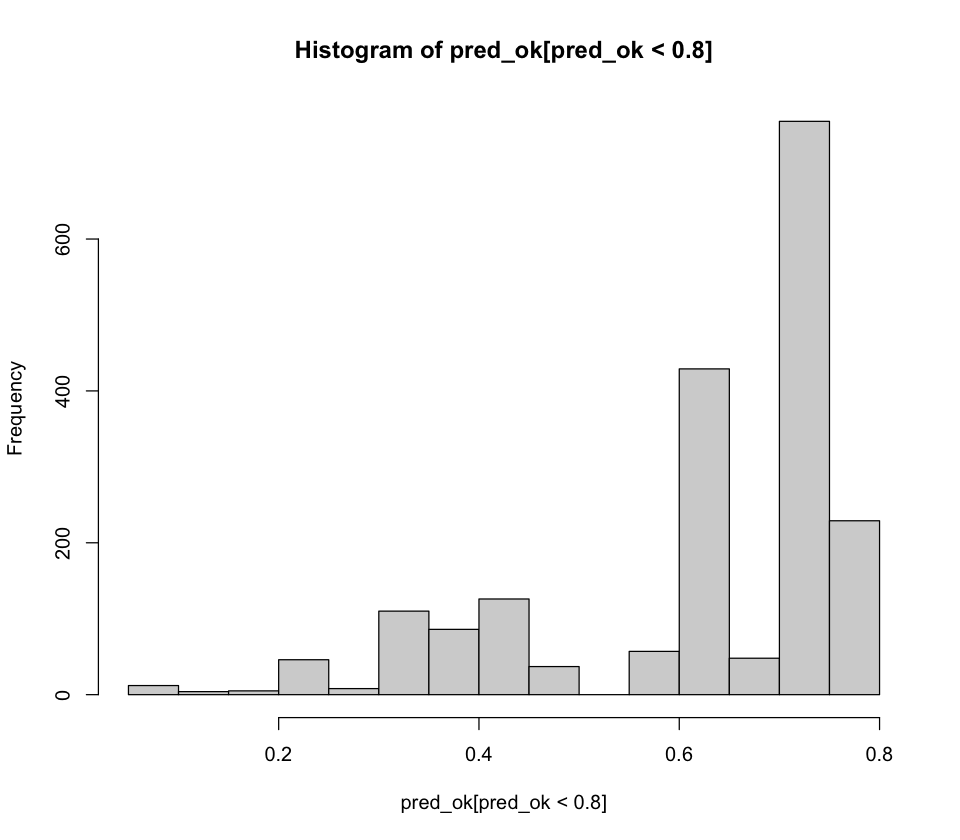

In [1073]:
hist(pred_ok[pred_ok<0.80])

In [1074]:
table(pred_mod2[,1]>0.75,dt_appo[-rows,target] )

       
           OK DEFAULT
  FALSE  1034     689
  TRUE  33954     413

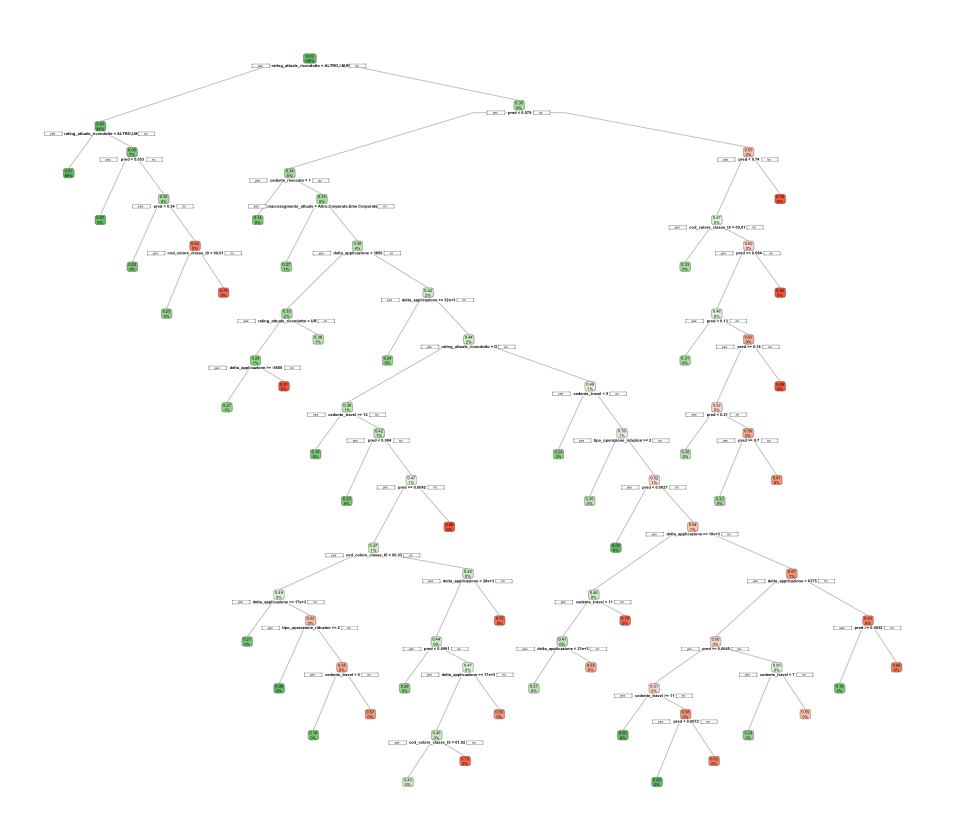

In [1075]:
options(repr.plot.width=8, repr.plot.height=7)
#pdf('prova.pdf')
rpart.plot(modello2, type=2, fallen.leaves=F, yesno=2, extra = 107,box.palette="-RdGn")
#dev.off()

In [1076]:
pmod2 <- pmml(modello2, model_name = "VPC Tree Model",
app_name = NULL,
description = NULL,
copyright = NULL)

In [1064]:
saveXML(pmod2, file="~/Downloads/treetest_prova.xml")

[1] "~/Downloads/treetest_surrugate.xml"

In [764]:
require(xml2)

Loading required package: xml2



In [810]:
model <- xmlParse( "~/Downloads/provaxml.xml")

In [811]:
(model)

<?xml version="1.0"?>
<TreeModel modelName="VPC Tree Model" functionName="classification" algorithmName="rpart" splitCharacteristic="binarySplit" missingValueStrategy="defaultChild" noTrueChildStrategy="returnLastPrediction">
  <Node id="1" score="OK" recordCount="29995" defaultChild="5">
    <True/>
    <ScoreDistribution value="OK" recordCount="29406" confidence="0.980363393898983"/>
    <ScoreDistribution value="DEFAULT" recordCount="589" confidence="0.0196366061010168"/>
    <Node id="4" score="OK" recordCount="10">
      <SimplePredicate field="importo" operator="lessThan" value="1000"/>
      <ScoreDistribution value="OK" recordCount="10" confidence="0.5"/>
      <ScoreDistribution value="DEFAULT" recordCount="100" confidence="0.5"/>
    </Node>
    <Node id="5" score="OK" recordCount="199" defaultChild="3">
      <SimplePredicate field="importo" operator="greaterOrEqual" value="1000"/>
      <ScoreDistribution value="OK" recordCount="29406" confidence="0.980363393898983"/>
     

In [822]:
library(data.tree)

In [820]:
list_model <- xmlToList(model)
str(list_model)

List of 2
 $ Node  :List of 6
  ..$ True             : NULL
  ..$ ScoreDistribution: Named chr [1:3] "OK" "29406" "0.980363393898983"
  .. ..- attr(*, "names")= chr [1:3] "value" "recordCount" "confidence"
  ..$ ScoreDistribution: Named chr [1:3] "DEFAULT" "589" "0.0196366061010168"
  .. ..- attr(*, "names")= chr [1:3] "value" "recordCount" "confidence"
  ..$ Node             :List of 4
  .. ..$ SimplePredicate  : Named chr [1:3] "importo" "lessThan" "1000"
  .. .. ..- attr(*, "names")= chr [1:3] "field" "operator" "value"
  .. ..$ ScoreDistribution: Named chr [1:3] "OK" "10" "0.5"
  .. .. ..- attr(*, "names")= chr [1:3] "value" "recordCount" "confidence"
  .. ..$ ScoreDistribution: Named chr [1:3] "DEFAULT" "100" "0.5"
  .. .. ..- attr(*, "names")= chr [1:3] "value" "recordCount" "confidence"
  .. ..$ .attrs           : Named chr [1:3] "4" "OK" "10"
  .. .. ..- attr(*, "names")= chr [1:3] "id" "score" "recordCount"
  ..$ Node             :List of 6
  .. ..$ SimplePredicate  : Named ch

In [825]:
 as.Node(list_model, nodeName = "Node")

                                        levelName
1  Node                                          
2   °--Node                                      
3       ¦--1                                     
4       °--2                                     
5           ¦--1                                 
6           °--2                                 
7               ¦--1                             
8               ¦   °--CompoundPredicate         
9               ¦       °--SimpleSetPredicate    
10              ¦           °--Array             
11              °--2                             
12                  ¦--1                         
13                  ¦   °--SimpleSetPredicate    
14                  ¦       °--Array             
15                  ¦--2                         
16                  ¦   °--CompoundPredicate     
17                  ¦       °--SimpleSetPredicate
18                  ¦           °--Array         
19                  °--3                         


In [935]:
?pdf